## SVD - PCA: More Applications
---


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os


## Eigenfaces  
---
>- The seminal paper on Eigenfaces [MIT Media Lab](https://direct.mit.edu/jocn/article/3/1/71/3025/Eigenfaces-for-Recognition)

>- Above paper arranged as easy lecture notes on [ScholarPedia] by Dr. Zhang and Dr. Tucker (http://scholarpedia.org/article/Eigenfaces)

>- Chapter 1 from Textbook By Dr. Brunton

---

### Summary of the mathematics for eigenfaces
---

<img src="./images/Eigenfaces1.png" width="80%"/>
Image source: Chapter 1 from Textbook by Brunton et. al.

>- The Columns of matrix $X \in \mathbb{R}^{m\times n}$ represent facial images after... 

>>- thorough preproessing (cropping,scaling, centering, alignment etc), 

>>- they should have been taken in similar lighting conditions, pose and facial expressions,

>>- background whould be consistent across all images or be removed.

>- The mean-adjusted faces $\tilde{X} = X - \bar{X}$, where $\bar{X} = \frac{1}{n} \sum_{j=1}^n X_{:j}$ (called the mean face). (Note that the data here is not column centered but row centered.)

>- Covariance matrix $S = \frac{1}{n-1}(X-\bar{X}) (X-\bar{X})^T$ (one can also just use $n$ in place of $n-1$).
>- Efficient to find eigendecomposition of $C = \frac{1}{n-1}(X-\bar{X})^T (X-\bar{X})$:
$$
CV = \Lambda V
$$

>- Equivalent SVD formulation: $(X-\bar{X}) = U \sum V^T$, implying $\tilde{X} V = U \sum$.

<div class="alert alert-success">
<strong>Note</strong> that in place of taking the usual approach of finding the eigen-decomposition of $(X-\bar{X}) (X-\bar{X})^T$, the above approach works better if the dimension of the images is larger compared to the number of images. The former would be preferred if the number of images is way more relative to the dimension.
</div>

<img src="./images/Eigenfaces2.png" width="80%"/>
Image source: Chapter 1 from Textbook by Brunton et. al.

>- **Face Space**: Columns of $U$ are called the eigenfaces of the facial image database given by matrix $X$. They form the face space whose origin is the average face and whose axes are the eigenfaces.

>- **Low rank ($k$ eigenfaces) representation** of the image database
$$\tilde{X}  \approx U_{(k)} \Sigma_{(k)} V_{(k)}^T = \sum\limits_{i=1}^{k} \sigma_i U_i V_i^T$$
where $\Sigma_{(k)}=diag(\sigma_1,\cdots, \sigma_k)\in \mathbb{R}^{k \times k}$.

### Face Reconstruction
**Retriving** the $p$-th image from the low rank representation
$$
\begin{align}
X_{:p} - \bar{X} &\approx U_{(k)} \left[ \Sigma_{(k)} V^T_{(k)} \right]_{:p}\\
X_{:p} &\approx \bar{X} + U_{(k)} \left[ \Sigma_{(k)} V^T_{(k)} \right]_{:p}\\
&= \bar{X} + U_{(k)} \left[  V_{(k)} \Sigma_{(k)} \right]^T_{p:}\quad \textrm{[upon transposing]}\\
&= \bar{X} + \sum_{j=1}^k \alpha_j U_{:j} \quad \text{ where }\ \alpha_j = \sigma_j V_{pj} = \sqrt{\lambda_j (n-1)}\;V_{pj}
\end{align}
$$

### Face Detection
---
How do we know whether a given candidate image $x$ is of a human or something else? Followwing step could be taken for determining so.

>- Projection of an image $x$ on the face space $ U_{(k)}  U_{(k)}^T (x-\bar{X}) = U_{(k)}  U_{(k)}^T\tilde{x}$.

>- Distance of the projection from the original 
$$
\delta = \|\tilde{x} - U_{(k)}  U_{(k)}^T \tilde{x}\|
$$

>- The distance of a face from the face space is smaller compared to other kind of images such as a dog, a tree, or cup etc. Hence a distance above a threshold could be considered a non-face.

<img src="./images/Eigenfaces3.png" width="80%"/>
Image source: Chapter 1 from Textbook by Brunton et. al.


### Face Recognition
---
Suppose we have been given a candidate facial image $x$, and we need to find all images that match the given image upto soem tolerance level. This is how we can accomplish this task.

>- Find the linear coding (or weight vector) in projecting an image $\tilde{x} = x - \bar{X}$ to the face space that is $U_{(k)} U_{(k)}^T  \tilde{x}$:
$$
\alpha =  U_{(k)}^T  \tilde{x}
$$

>- An image could belong to a person $c$ if the 
$$
\|\alpha - \alpha_c\| \le \theta,\ \text{ a predefined threshold }
$$

>- If the threshold criteria is not met then the image is declared unknown.

#### Eigenface Example:

>- Following example is from a [Scikit-Learn documentation](https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html). Only some minor modifications have been made to the original code.

>- See the code with the textbook by [Brunton et. al.](http://databookuw.com/) for more example.

In [45]:
"""This function helps visualising the portraits from the dataset."""
def plot_gallary(images, titles, height, width, rows, cols):
    plt.figure(figsize=(2 * cols, 2 * rows))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.30,)
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

Dimensions of the array holdign all images: (2000, 64, 64)


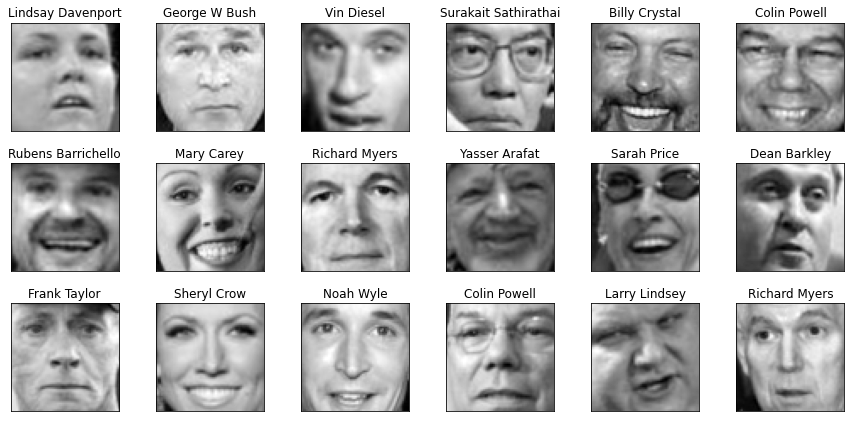

In [46]:
# The folder of images
dir='lfwcrop_grey/faces' #dir='YALE/centered'
#Find all the file names
famous_people=os.listdir(dir)[1:2001]
#Relative path for every images file
famous_ones=[dir+'/' + face for face in famous_people]
#Read all the image files
all_images=np.array([plt.imread(face) for face in famous_ones], dtype=np.float64)
# Retrieve the names of the celebrities from the file names
people_names=[name[:name.find('0')-1].replace("_", " ") for name in famous_people]
# Find the dimension of the ndarray holdig all the images
n_samples, h, w = all_images.shape
print("Dimensions of the array holdign all images:",all_images.shape)
# Show a few images
plot_gallary(all_images, people_names, h, w, rows=3, cols=6)

In [47]:
# This function finds a low dimensional basis representation of the images
def eigenfaces(X, n_pc):
    # Find the number of features and samples
    ## Note that every row is an images in X in this code
    n_samples, n_features = X.shape
    # Find mean-face
    X_mean = np.mean(X, axis=0)
    centered_X = X-X_mean
    pca = PCA(n_components=n_pc)
    projected  = pca.fit_transform(centered_X)
    #U, S, V = np.linalg.svd(centered_data)
    components = pca.components_
    #projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, X_mean, centered_X

In [48]:
n_components = 200
# Create the data matrix from all the images
X = all_images.reshape(n_samples, h*w)
P, C, M, Y= eigenfaces(X, n_components)

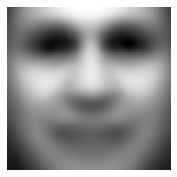

In [49]:
# The mean-face of some famous people
plt.figure(figsize=(3,3))
plt.axis('off')
plt.imshow(M.reshape((h, w)), cmap=plt.cm.gray)
plt.show()

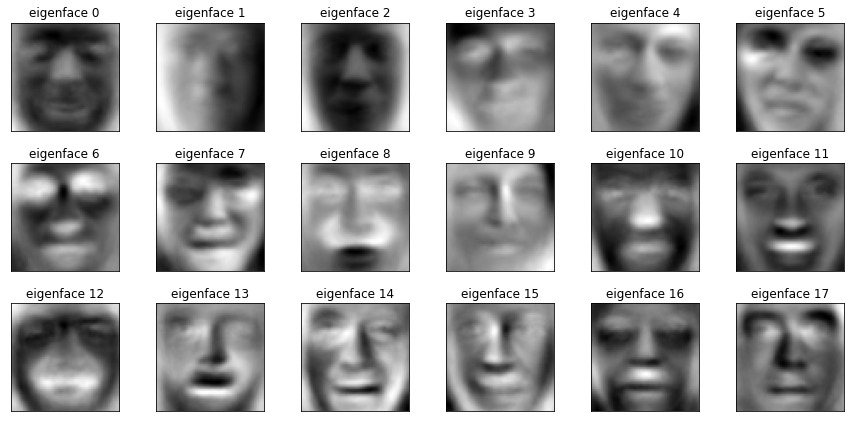

In [50]:
# Here is the face-space made of all the eigenface
eigenfaces = C.reshape((n_components, h, w))
# Give the eigenfaces some names.
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
# Let us see what the eigenfaces are
plot_gallary(eigenfaces, eigenface_titles, h, w, 3, 6) 

In [ ]:
# Let us see a low-rank reconstruction of some facial images
def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image

recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(images))]

Some reconstructions:

Compare with the originals:



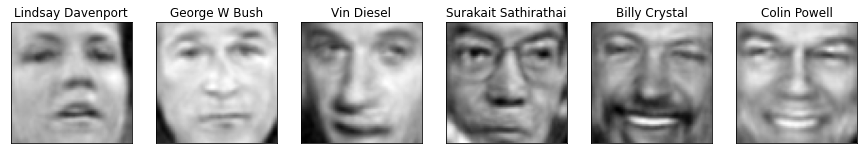

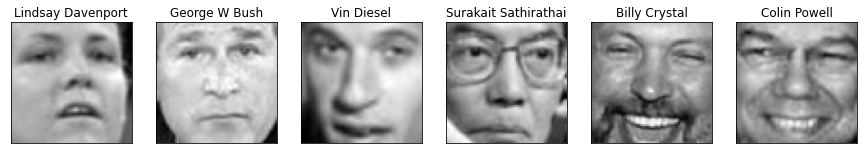

In [44]:
print("Some reconstructions:\n")
plot_gallary(recovered_images, celebrity_names, h, w, rows=1, cols=6)

print("Compare with the originals:\n")
plot_gallary(all_images, celebrity_names, h, w, rows=1, cols=6)

#### Some observations on eigenfaces (Brunton)

>- First few eigenfaces 'capture the most common features shared among all human faces...'

>- '... while the other PCs will be more useful in distinguishing between individuals...'

>- '... additional PCs may capture differences in lighting angles.'

#### Alignment of data and SVD
<div class="alert alert-danger">
"<strong>SVD is sensitive to the alignment in data.</strong> In fact the SVD rank explodes when objects in the columns translate, rotate or scale, which severely limits its use for data that has not been heavily preprocessed"
</div>

### Robust PCA
---
**Question**: Do you agree that finding the first-$k$ PCs is equivalent to solving the following problem? Provide your reasoning.

$$\large
\operatorname{minimize}\ \|\tilde{X}-L\|_F,  \textrm{ subject to }\ \operatorname{rank}(L) \leq k.
$$

<div class="alert alert-block alert-danger">
Note: PCA is sensitive to presence of outliers and errors in dataset.
</div>

<font style="color:blue; font-weight:bold;"> Robust Principal Component Analysis </font>: Decomposition as $\tilde{X} \approx L+S$, such that $L$ represents the low-rank structure in the data and $S$ represents sparse `noise' in $A$.

<div class='eqnbox'>
$$\large
\operatorname{minimize}\ \|L\|_* + \lambda\, \|S\|_1
$$
</div>

where $\|L\|_* = \sigma_1 + \cdots+ \sigma_r$ is called the **nuclear norm** of $L$ and $\lambda$ is a penalty parameter.

>- In some applications such as video surveillance, we are interested in 'noise'.


>- Choice of $\lambda = 1/ \sqrt{max(n,\,m)}$ works well, so we can avoid parameter tuning.

>- <font color='green'>Principal component pursuit</font> is a popular method for this optimization. Under certain non-stringent conditions it is possible to find the low-rank and sparse components with high probability. 

[Reading 3](https://arxiv.org/abs/0912.3599) 

#### Question: How does $L_1$ norm induce sparsity? LASSO vs Ridge.
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/L1_and_L2_balls.svg" width="80%" />

[Image Source: WikiMedia](https://upload.wikimedia.org/wikipedia/commons/f/f8/L1_and_L2_balls.svg)

**READING: Augmented Lagrangian Method** for solving constrained optimization problems.

[University of Winsconsin Notes](http://pages.cs.wisc.edu/~swright/nd2016/IMA_augmentedLagrangian.pdf)

[Wikipedia](https://en.wikipedia.org/wiki/Augmented_Lagrangian_method)

>- Here is a detailed set of [notes on RPCA](https://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/3.%20Background%20Removal%20with%20Robust%20PCA.ipynb)

>- Here is a quick [blog on RPCA](https://kojinoshiba.com/robust-pca/)